<a href="https://colab.research.google.com/github/gioguarnieri/AjustedeCurvas/blob/master/Estat%C3%ADstica_Computacional/Aula_6_Giovanni_Guarnieri_Soares.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Computational Statistics, class 6 homework
Studet: Giovanni Guarnieri Soares

Professor: Leonardo Bacelar Lima Santos

# Lecture video

In [1]:
# capture is a magic command to capture the output
%%capture
!pip install -U kaleido # needed to the images
!pip install plotly>=4.0.0
!wget https://github.com/plotly/orca/releases/download/v1.2.1/orca-1.2.1-x86_64.AppImage -O /usr/local/bin/orca
!chmod +x /usr/local/bin/orca # needed to save the images
!apt-get install xvfb libgtk2.0-0 libgconf-2-4

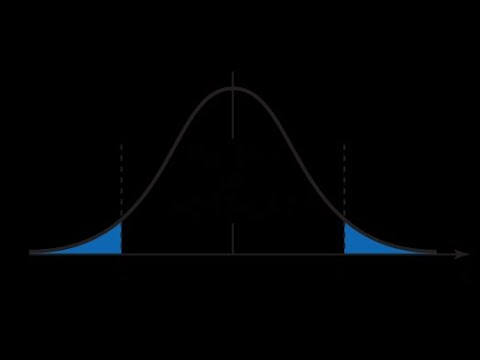

In [2]:
import plotly.io as pio

pio.renderers

from IPython.display import YouTubeVideo
YouTubeVideo('AvVZlLCuuXg')

# Importing necessary modules

In [3]:
import random as rnd # The random number generator module
import numpy as np # random number generator module and some other tools
import plotly.express as px # plotting module
import plotly.graph_objects as go # plotting module
import statistics # built-in statistics module
import math # mathematics built-in module
import sys
print("User Current Version:-", sys.version) # Checking system version

pio.renderers.default = "png" # setting png as default so images appear in github

User Current Version:- 3.7.13 (default, Mar 16 2022, 17:37:17) 
[GCC 7.5.0]


# Exercises

## From a set of N elements divide in subsets of K size

The first exercise brings a question on how many different subsets with size $K$ we can divide a set of $N$ elements, in example, if we have an array $A = [1, 2, 3, 4]$, how can we divide in a subset of 2?

$Subsets = [1,2], [3,4], [1,3],[2,4], [1,4], [2,3]$

It is important to note that the subset $[2,1]$ is the same as $[1,2]$, since it is a set.

We don't need to see all the subsets to know how many possible subsets are present, we can simply calculate using the Binomial Coefficient:

$$\binom{N}{K} = \frac{N!}{K!(N-K)!}$$

where N is the size of the set, and K the size of the subset desired. To our set and subset $N=4$ and $K=2$.

$$\binom{4}{2} = \frac{4!}{2!(4-2)!} = \frac{4\times3\times2\times1}{2\times1\times2\times1}$$


$$\binom{4}{2} = \frac{4\times3\times\not{2}}{2\times\not{2}} = 6$$

This way, from $N$ we chose $K$.

Now, to test how the subset's size can change the values of mean and standard deviation, we will generate 100 random integer numbers and turn it into a set, so there will not be any repeated numbers, and select a growing subset of size 10 to 50.



From 100 numbers generated to 78 in the set
Example subset[3, -57, -24, -92, -55, 19, -4, -70, 8, 20] with size 10


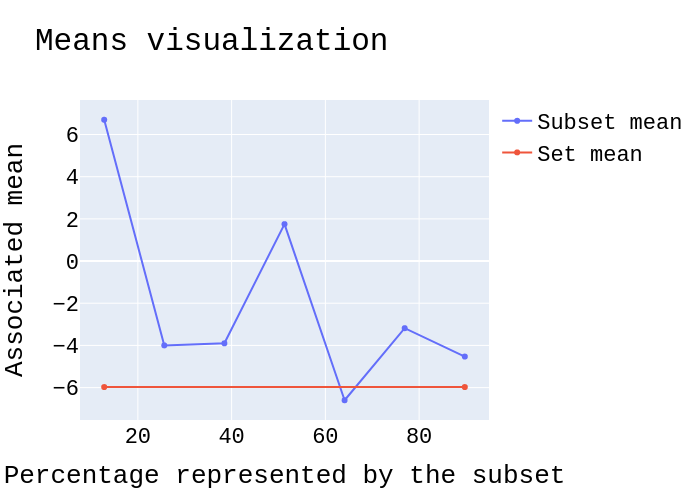

In [4]:
np.random.seed(8666)
rnd.seed(8666)
amnt = 100
k = 10
Set = set(np.random.randint(-amnt, amnt, amnt))
sizeSet = len(Set)
print(f"From 100 numbers generated to {sizeSet} in the set")

Subset = list(rnd.sample(Set, k))
Set_ = list(Set)

print(f"Example subset{Subset} with size {k}")
meanSet = np.mean(Set_)
stdSet = np.std(Set_)

meanSubsets = []
stdSubsets = []
for k in range(10,80,10):
  Subset = list(rnd.sample(Set, k))
  meanSubsets.append(np.mean(Subset))
  stdSubsets.append(np.std(Subset))
percentage = np.arange(10,80,10)/sizeSet*100
fig = go.Figure() # Starting the figure
fig.add_trace(go.Scatter(x = percentage, y = meanSubsets,  name = f"Subset mean")) # Plotting the trace 1
fig.add_trace(go.Scatter(x = [min(percentage),max(percentage)], y = [meanSet,meanSet], name = f"Set mean"))
fig.update_layout(
    font=dict(
        family="Courier New, monospace",
        size=22,
        color="Black"
    ),
    xaxis_title="Percentage represented by the subset",
    yaxis_title="Associated mean",
    title = "Means visualization",
) # Changing the font and adding the title
fig.show()

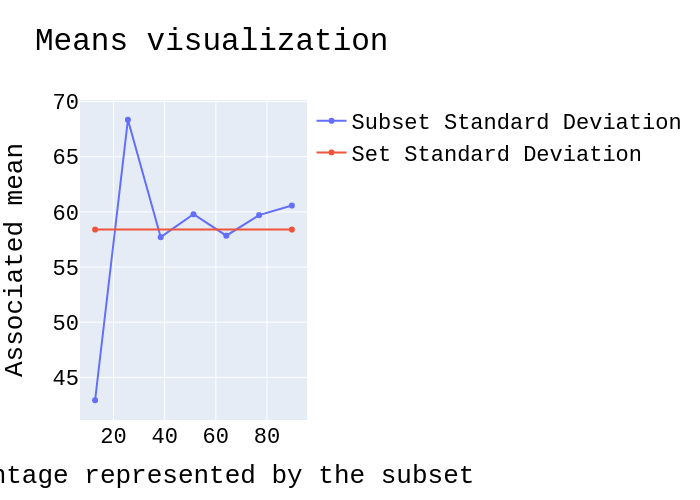

In [5]:
fig = go.Figure() # Starting the figure
fig.add_trace(go.Scatter(x = percentage, y = stdSubsets,  name = f"Subset Standard Deviation")) 
fig.add_trace(go.Scatter(x = [min(percentage),max(percentage)], y = [stdSet,stdSet], name = f"Set Standard Deviation"))
fig.update_layout(
    font=dict(
        family="Courier New, monospace",
        size=22,
        color="Black"
    ),
    xaxis_title="Percentage represented by the subset",
    yaxis_title="Associated mean",
    title = "Means visualization",
) # Changing the font and adding the title
fig.show()

It is important to notice that an array is randomly generated and turned into a set without duplicated numbers. This way, we plot the percentage which the subset represents in the set. In here, we use only a set of maximun size $100$, so we are going to explore bigger sets.

From 1000 numbers generated to 778 in the set
Example subset[-224, 32, -890, -646, 782, -883, -276, -426, 157, -63] with size 10


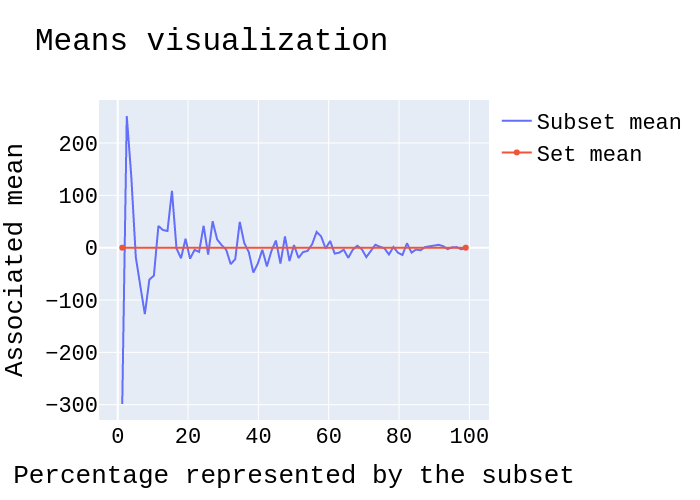

In [6]:
np.random.seed(8666)
rnd.seed(8666)
amnt = 1000
k = 10
Set = set(np.random.randint(-amnt, amnt, amnt))
sizeSet = len(Set)
print(f"From 1000 numbers generated to {sizeSet} in the set")

Subset = list(rnd.sample(Set, k))
Set_ = list(Set)

print(f"Example subset{Subset} with size {k}")
meanSet = np.mean(Set_)
stdSet = np.std(Set_)
x = np.arange(10,sizeSet,10)
meanSubsets = []
stdSubsets = []
for k in x:
  Subset = list(rnd.sample(Set, k))
  meanSubsets.append(np.mean(Subset))
  stdSubsets.append(np.std(Subset))
percentage = x/sizeSet*100
fig = go.Figure() # Starting the figure
fig.add_trace(go.Scatter(x = percentage, y = meanSubsets,  name = f"Subset mean")) # Plotting the trace 1
fig.add_trace(go.Scatter(x = [min(percentage),max(percentage)], y = [meanSet,meanSet], name = f"Set mean"))
fig.update_layout(
    font=dict(
        family="Courier New, monospace",
        size=22,
        color="Black"
    ),
    xaxis_title="Percentage represented by the subset",
    yaxis_title="Associated mean",
    title = "Means visualization",
) # Changing the font and adding the title
fig.show()

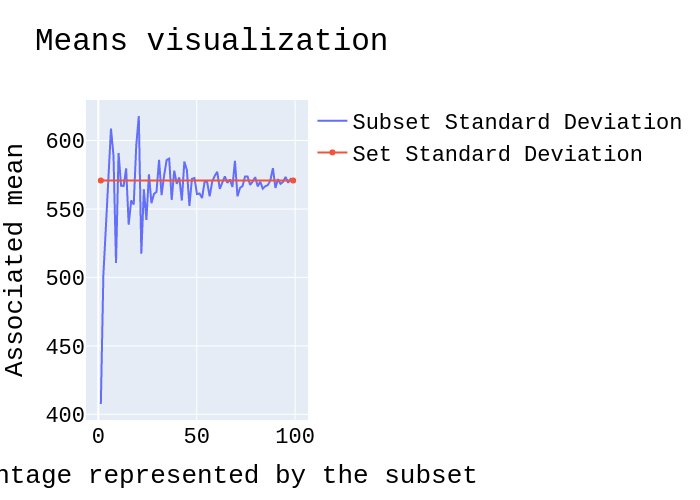

In [7]:
fig = go.Figure() # Starting the figure
fig.add_trace(go.Scatter(x = percentage, y = stdSubsets,  name = f"Subset Standard Deviation")) 
fig.add_trace(go.Scatter(x = [min(percentage),max(percentage)], y = [stdSet,stdSet], name = f"Set Standard Deviation"))
fig.update_layout(
    font=dict(
        family="Courier New, monospace",
        size=22,
        color="Black"
    ),
    xaxis_title="Percentage represented by the subset",
    yaxis_title="Associated mean",
    title = "Means visualization",
) # Changing the font and adding the title
fig.show()

Here we see how the size of the set influences the percentage needed to achieve a better result. With a subset of about 25% of the set we can achieve values close to the mean.

## An example

"Uma amostra de 25 adultos do sexo masculino em uma cidade mostrou que o nível de colesterol tem média de 186 e desvio padrão de 12. Considrando que nessa cidade o nível de colesterol da população de adultos do sexo masculino segue uma normal, obter o intervalo de confiança de 95% para a média."

In [8]:
def plot_percentiles(data, percentiles, colors, title = None, amount = 10, tol = 0.5):
  counts, bins = np.histogram(data,
                              bins="auto", 
                              range=(min(data),max(data)), 
                              density = True) # making the bins
  bins = 0.5 * (bins[:-1] + bins[1:]) # making the bins stay in the middle
  j=0
  pos = []
  for i in range(len(bins)):
    if math.isclose(sum(counts[:i])/sum(counts)*100, percentiles[j], abs_tol = tol ) and j < len(colors):
      pos.append(i)
      j+=1


  k=0
  fig = px.bar(x=bins, 
                y=counts, 
                labels={'x':'RNG', 'y':'count'}, 
                title = title,
                width=1200, height=600) # plotting
  for i in pos:
    fig.add_trace(go.Scatter(x=[bins[i],bins[i]],
                          y=[0,max(counts)], 
                          mode='lines', 
                          line=dict(color=colors[k], width=2, dash='dash'),
                          name=f"Percentile: {percentiles[k]}%, x = {bins[i]:.2f}"))
    k+=1

  fig.update_layout(
      font=dict(
          family="Courier New, monospace",
          size=22,
          color="Black"
      )
  )
  return fig


In [9]:
np.random.seed(8666)
mu, sigma = 186, 12 # mean and standard deviation
data = np.random.normal(mu, sigma, 25)

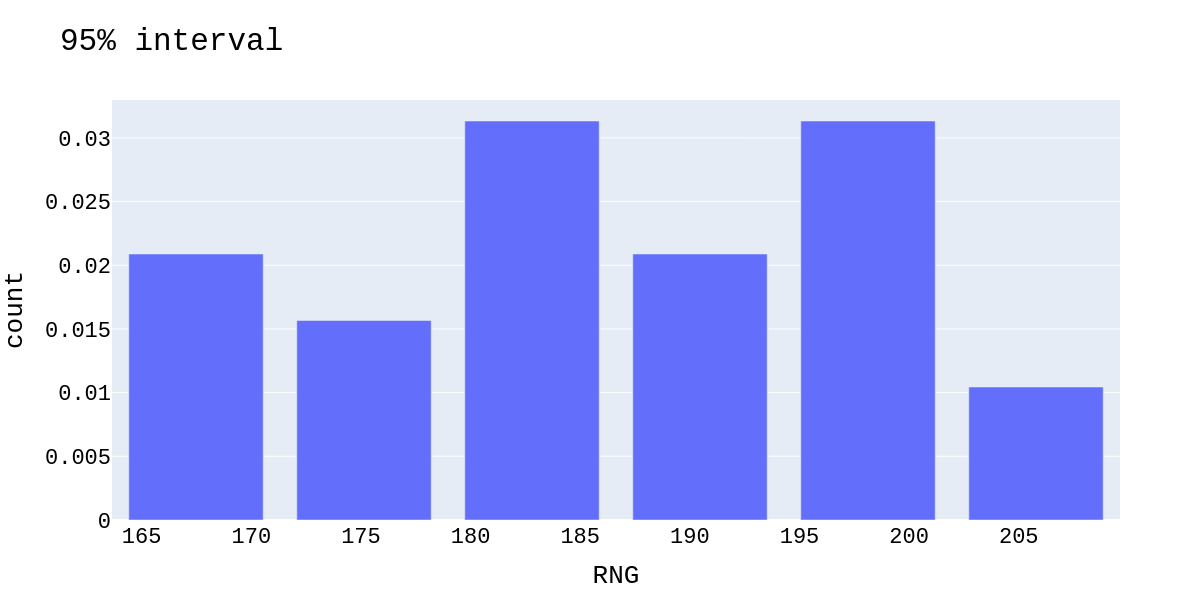

In [10]:
percentiles = [5, 95]
colors = ["firebrick", "firebrick"]
title = "95% interval"

plot_percentiles(data, percentiles, colors, title, amount = 20, tol = 3)